**Download course materials**

In [1]:
# download the tutorial materials
!gdown --id '1_C0okz66Oox8UbWVvWXWycj80iwyzHfR' -O dataset.zip
!unzip -q dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1_C0okz66Oox8UbWVvWXWycj80iwyzHfR
To: /content/dataset.zip
100% 444k/444k [00:00<00:00, 90.4MB/s]


**Import required libraries**

In [2]:
# Import the required library
import cv2 
import numpy as np
import matplotlib.pyplot as plt # Display image by matplotlib

**Read and write of image**

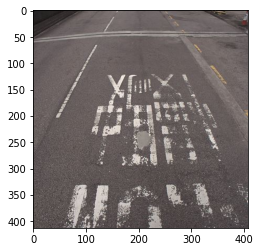

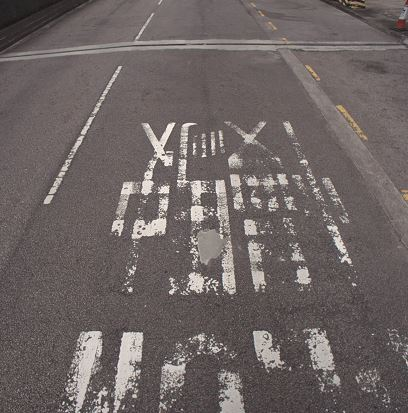

True

In [3]:
# Read image
original_image = cv2.imread('/content/Lesson1_materials/sample_Img1.jpg')

# Show the image
RGB_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

# Using openCV to show image
from google.colab.patches import cv2_imshow # Display image by OpenCV
cv2_imshow(original_image)

# Change it to grey scale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)  

# Save the output image
cv2.imwrite('output.jpg', gray_image)    

**Basic operations of image processing**

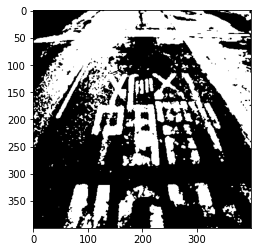

In [4]:
# Read image
original_image = cv2.imread('/content/Lesson1_materials/sample_Img1.jpg')

# Change it to grey scale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)  

# Resize
resizedImg = cv2.resize(gray_image, (400, 400), interpolation = cv2.INTER_CUBIC) 

# Blur
# Convert the photo to gray scale，using Gaussian Blurring to remove noise
GausBlur = cv2.GaussianBlur(resizedImg, (5, 5), 0)

# Binary Image
# If greater than T, set it to maximum, else 0
(T, thresh) = cv2.threshold(GausBlur, 100, 255, cv2.THRESH_BINARY)

# Show the image
RGB_img = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

**Adding lines and test**

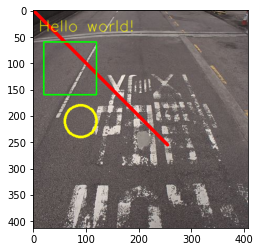

In [5]:
# Read image
original_image = cv2.imread('/content/Lesson1_materials/sample_Img1.jpg')

# Adding lines and circles
cv2.line(original_image, (0, 0), (255, 255), (0, 0, 255), 5)
cv2.rectangle(original_image, (20, 60), (120, 160), (0, 255, 0), 2)
cv2.circle(original_image, (90, 210), 30, (0, 255, 255), 3)
# Adding text
text = 'Hello world!'
cv2.putText(original_image, text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 1, cv2.LINE_AA)  

# Show the image
RGB_img = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

**Cropping of images**

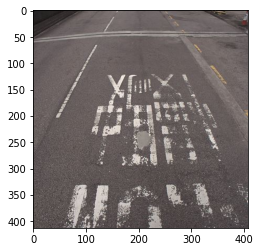

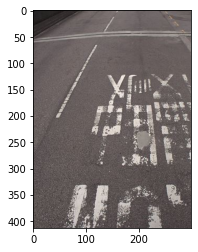

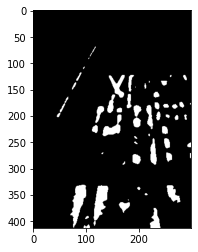

In [6]:
# Read image
original_image = cv2.imread('/content/Lesson1_materials/sample_Img1.jpg')

#Crop the photo, format–> Y1: Y2 X1: X2 
cropped = original_image[0: 500, 0: 300]

RGB_img1 = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img1)
plt.show()

RGB_img2 = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img2)
plt.show()

imgTest = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY) 
imgTestBlur = cv2.GaussianBlur(imgTest, (11, 11), 0)

(T, thresh) = cv2.threshold(imgTestBlur, 150, 255, cv2.THRESH_BINARY)	

RGB_img3 = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img3)
plt.show()


**Edges dectection and contour**

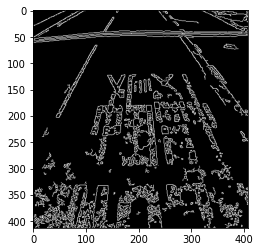

In [7]:
# Read image
original_image = cv2.imread('/content/Lesson1_materials/sample_Img1.jpg')
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY) 
img = cv2.GaussianBlur(gray, (3, 3), 0)
canny = cv2.Canny(img, 30, 100)

# Show the image
RGB_img = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

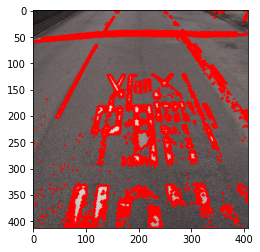

In [8]:
# Read image
original_image = cv2.imread('/content/Lesson1_materials/sample_Img1.jpg')
imageCopy = original_image.copy()

gray = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2GRAY) 

# Binary Image
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Calculate the contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imageCopy, contours, -1, (0, 0, 255), 3)

# You can base on the contours to continue for other post-processing decision
#print(len(contours))
#print(cv2.contourArea(contours[200]))

# Show the image
RGB_img = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

**Some applications of using contours**

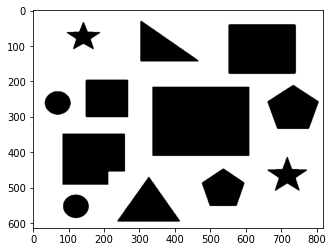

Total Numbers of contours: 13

There are 150 points in contour 1
There are 3 vertics in contour 1
The area is:  11660.5  in contour

There are 108 points in contour 2
There are 3 vertics in contour 2
The area is:  10043.0  in contour



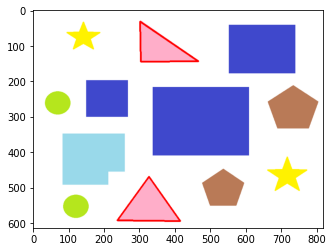

In [9]:
import cv2
import numpy as np

img = cv2.imread('/content/Lesson1_materials/pattern.png')

img_resized = cv2.resize(img, None,fx=0.8, fy=0.8, interpolation = cv2.INTER_CUBIC)

imgGrayscale = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)                 # grayscale

imgBlurred = cv2.GaussianBlur(imgGrayscale, (5, 5), 0)                       # blur

ret, binary = cv2.threshold(imgBlurred, 230, 255, cv2.THRESH_BINARY)   

# Show the image
RGB_img = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()


contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)   

# Numbers of contours in the image
print ("Total Numbers of contours:", str(len(contours)), end="\n\n")

index = 0

for cnt in contours:
    # 0.01: very high precision
    approxVertex = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)

    if len(approxVertex)==3:

        cv2.drawContours(img_resized, [approxVertex], -1, (0, 0, 255), 3)

        index = index + 1

        print ("There are " + str(len(cnt)) + " points in contour", index)
        print ("There are " + str(len(approxVertex)) + " vertics in contour", index)

        area = cv2.contourArea(cnt)
        print ("The area is: ", area, " in contour", end="\n\n")

# Show the image
RGB_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

**Exercise 2a – Features extraction**

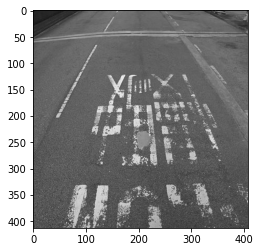

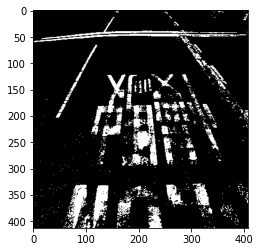

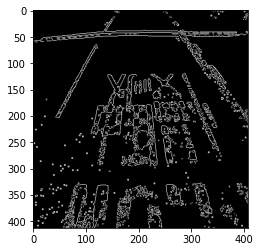

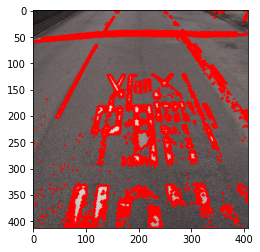

In [17]:
'''
Read the sample image and produce the features as shown in the handout
'''
import cv2
import numpy as np

original_image = cv2.imread('/content/Lesson1_materials/sample_Img1.jpg')
imageCopy = original_image.copy()

# Figure 1 (Grey Image)
gray = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2GRAY) 

RGB_img = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

# Figure 2 (Binary Image)
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

RGB_img = cv2.cvtColor(binary, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

# Figure 3 (Canny Edges)
canny = cv2.Canny(binary, 100, 200)

RGB_img = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

# Figure 4 (Contour)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imageCopy, contours, -1, (0, 0, 255), 3)

RGB_img = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

**Exercise 2b – Face detection**

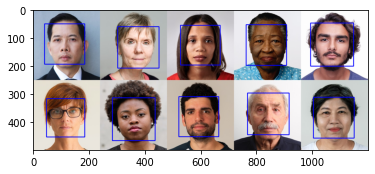

In [10]:
'''
Read the test image and detect the faces by Haar features
'''

import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/Lesson1_materials/haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('/content/Lesson1_materials/testImg.jpg')
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Show the image
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()